![](TSF1.JPG)

### As a business manager, try to find out the weak areas where you can work to make more profit.

In [2]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading the csv file
store = pd.read_csv('SampleSuperstore.csv')

In [4]:
# head give overview of first five rows of data
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### - The Data set does not contain any null values

In [6]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### - Profit is dependent feature and rest all the columns are independent fearures

In [7]:
store.duplicated().sum()

17

In [8]:
store.drop_duplicates(inplace=True)

In [9]:
print(store.shape)

(9977, 13)


In [10]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [11]:
store.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

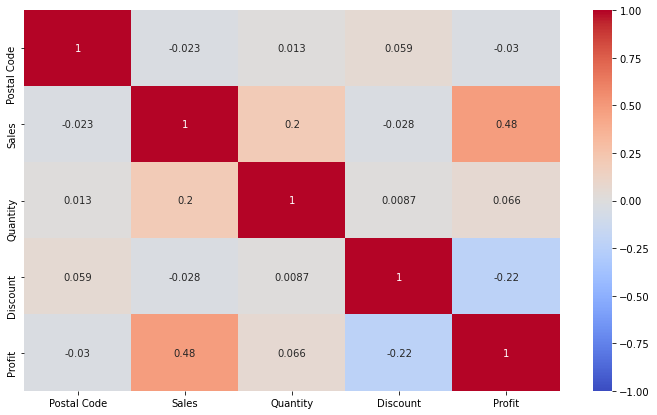

In [12]:
plt.figure(figsize=(12, 7))
sns.heatmap(store.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### - Sales has some positive correlation with Profit from the above figure
#### - And Discount has negative correlation with the profit

<Figure size 864x504 with 0 Axes>

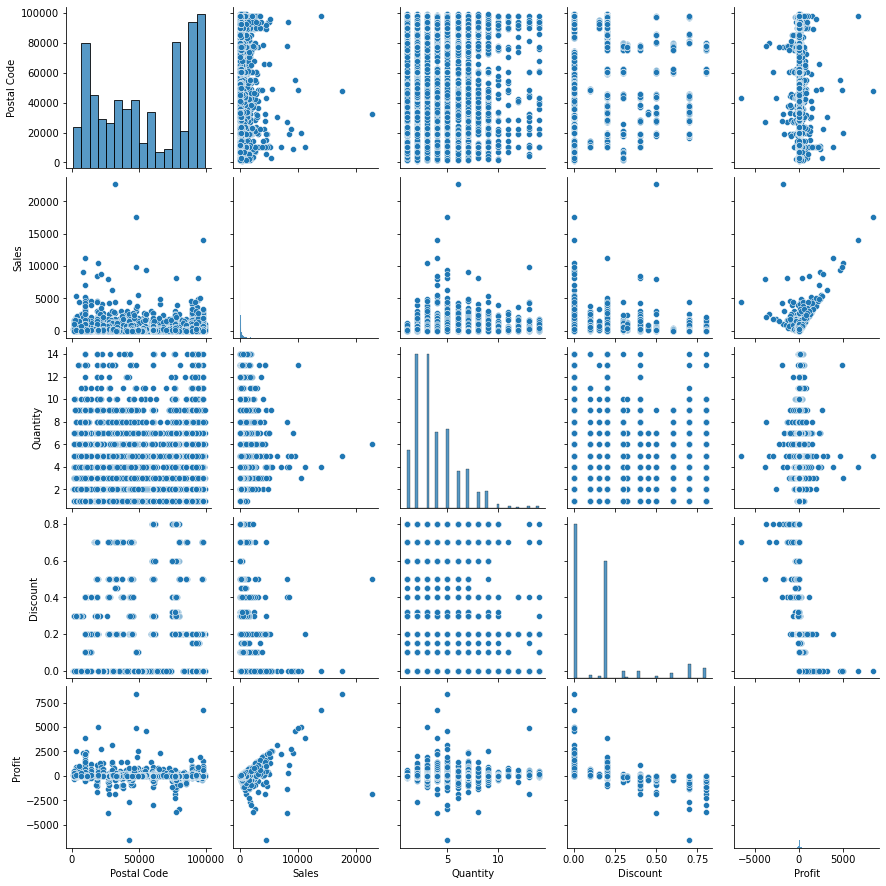

In [13]:
plt.figure(figsize=(12, 7))
sns.pairplot(store)

#### - We observe all other features with respect to profit
#### - We can see that sales has both positive relation on profit, and we can also observe that there are some exceptional cases like      profit is low even with some sales. we have to find "what area or feature is causing negative relation"??
#### - Discount higher than 0.2 or 20% is impacting negatively in profits

In [14]:
# Numerical features
numerical_features = [feature for feature in store.columns if store[feature].dtypes != 'O']

In [15]:
numerical_features

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [16]:
store[numerical_features].head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


In [17]:
discrete_feature=[feature for feature in numerical_features if len(store[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [18]:
#Discrete Variables
discrete_feature

['Quantity', 'Discount']

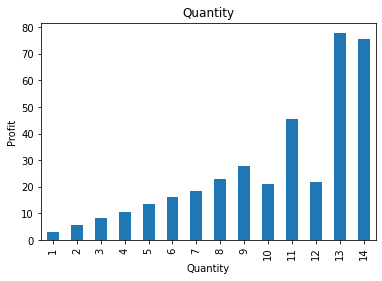

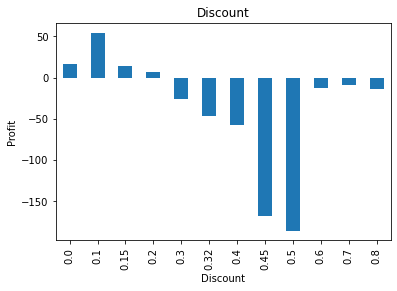

In [19]:
## Lets Find the realtionship between descrete features and profit

for feature in discrete_feature:
    data=store.copy()
    data.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plt.show()

#### We can see relation between "Quantity" , "Profit" and "Discount" , "Profit"
#### It is quite Normal that as quantity increases, the profit also increases and as Discount more than 20 % is causing loss .

In [20]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [21]:
continuous_feature

['Postal Code', 'Sales', 'Profit']

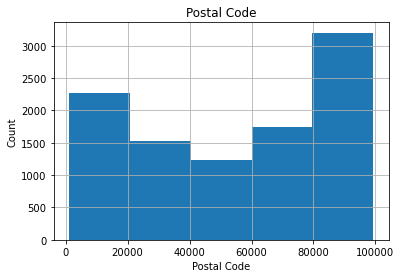

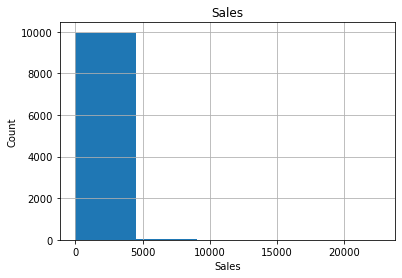

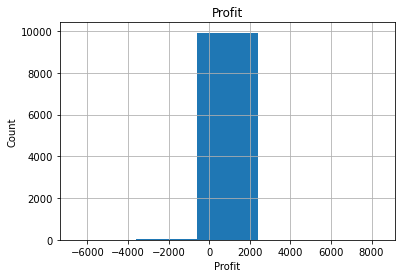

In [22]:

for feature in continuous_feature:
    data=store.copy()
    data[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


####  - We dont see much information from above analysis, we just got to know that most of the sales are between 0-4500.
####  - And we can also see negative values in the profit histogram we will find out reason in further analysis.

C:\Users\Anurag\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Anurag\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


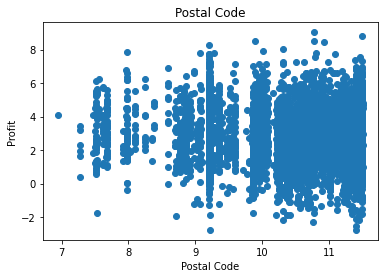

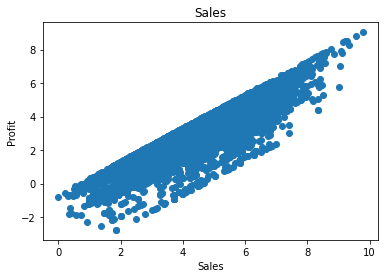

In [23]:
for feature in continuous_feature:
    data=store.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Profit']=np.log(data['Profit'])
        plt.scatter(data[feature],data['Profit'])
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.title(feature)
        plt.show()

#### - There is a identical relation between sales and profit - as sales increases the profit increases, but There are some outliers as even with more number of sales the profit decreases. We need to find out what is cause behing it? 
#### - And In the postal code we even see some losses as some areas must taken care off.

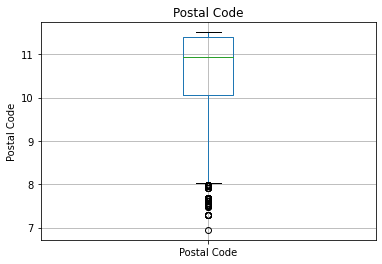

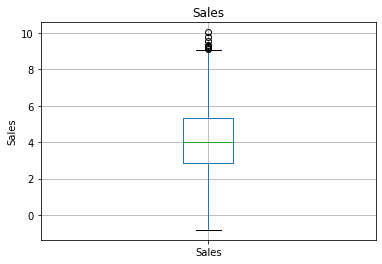

In [24]:
## Outliers

for feature in continuous_feature:
    data=store.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

#### - The postal code has some outliers this may be due to there could be some areas which do not order/buy the products  frequently
#### - The sales section also have some of the outliers when there are more numbere of sales, this is also due the factor that at some point in a season the sales increases than the average number of sales due to offers or due to discounts.

In [25]:
store['Sales'].describe()

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64

In [26]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### categorical values

In [27]:
categorical_features = [feature for feature in store.columns if data[feature].dtypes=='O']
categorical_features

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are -------- {}'.format(feature,len(store[feature].unique())))

The feature is Ship Mode and number of categories are -------- 4
The feature is Segment and number of categories are -------- 3
The feature is Country and number of categories are -------- 1
The feature is City and number of categories are -------- 531
The feature is State and number of categories are -------- 49
The feature is Region and number of categories are -------- 4
The feature is Category and number of categories are -------- 3
The feature is Sub-Category and number of categories are -------- 17


In [29]:
for feature in categorical_features:
    if len(store[feature].unique())<20:
        print(feature, "\t -------------- \t",store[feature].unique() )

Ship Mode 	 -------------- 	 ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment 	 -------------- 	 ['Consumer' 'Corporate' 'Home Office']
Country 	 -------------- 	 ['United States']
Region 	 -------------- 	 ['South' 'West' 'Central' 'East']
Category 	 -------------- 	 ['Furniture' 'Office Supplies' 'Technology']
Sub-Category 	 -------------- 	 ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


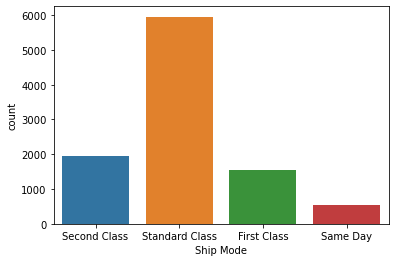

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


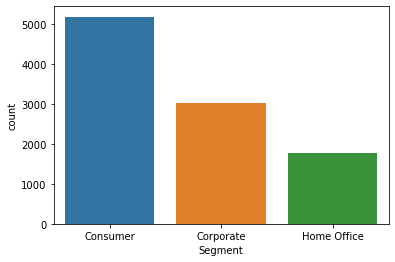

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


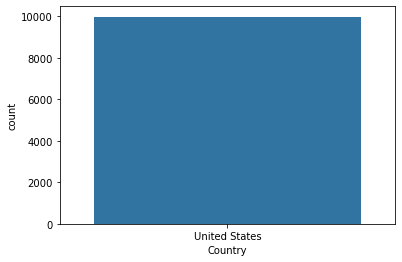

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


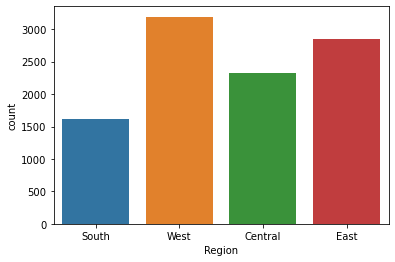

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


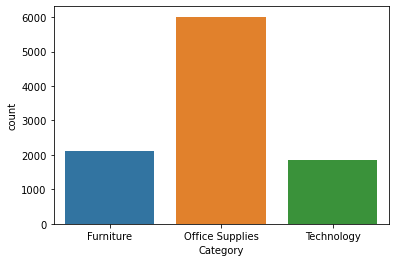

In [30]:
for feature in categorical_features:
    data=store.copy()
    if len(data[feature].unique())<10:
        sns.countplot(data[feature])
        plt.show()


#### - Most of the consumers choose standard class for delivery followed by second class
#### - The most of the products that are sold are bought by consumers than the home office and corporate segment
#### - The conunt of sale is high in west and followed by east side of the country
#### - The office Supplies category products are most sold  than the furniture and technology

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

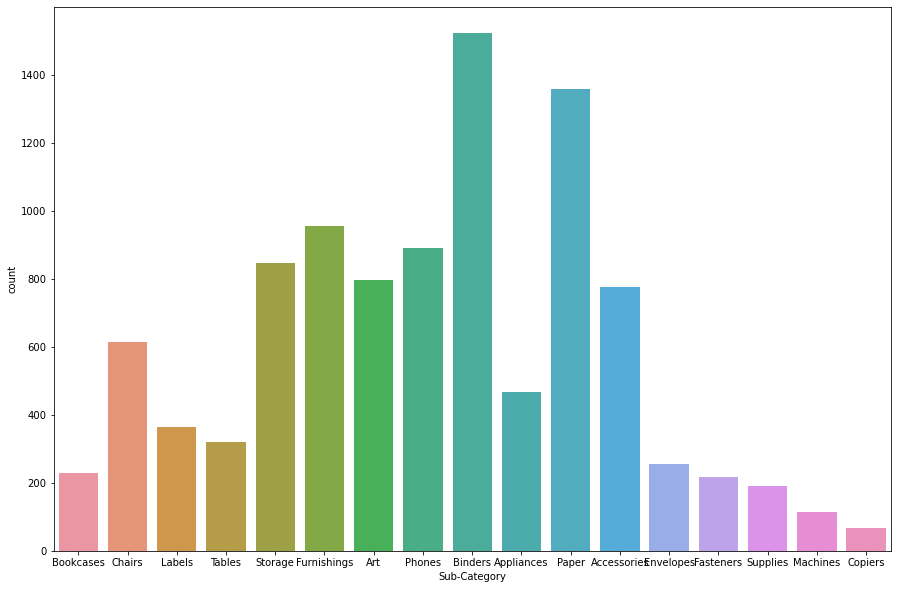

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(store['Sub-Category'])

#### - As we see the products like Binders , Papers, furnishings are more in number comparatively with others

<AxesSubplot:ylabel='State'>

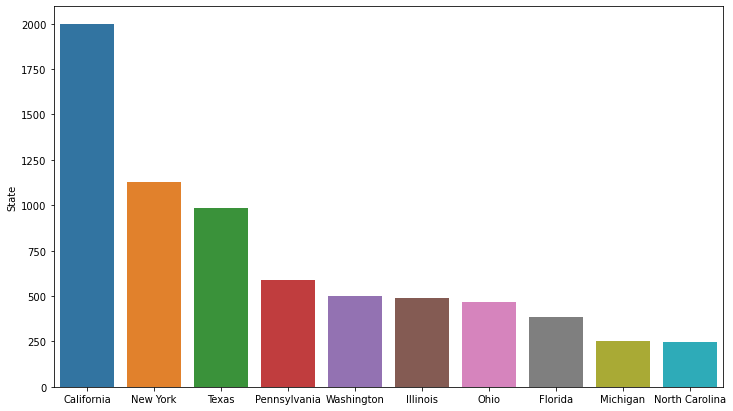

In [32]:
plt.figure(figsize=(12, 7))
sns.barplot(x = store['State'].value_counts().index[0:10], y=store['State'].value_counts()[0:10])

#### - The califonia, New York, Texas has highest in number as more products are ordered by these states in country

In [33]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:xlabel='Segment', ylabel='count'>

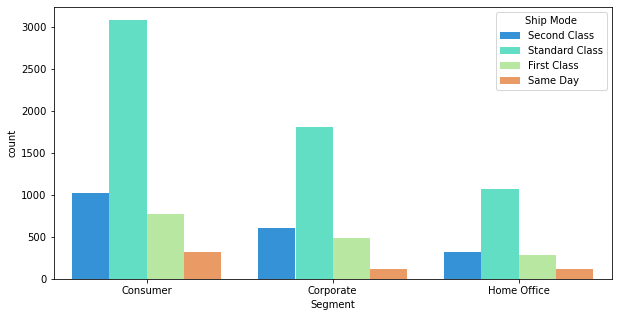

In [34]:
plt.figure(figsize=(10, 5))
#custom_palette = [ "cyan", "light orange", "light green", "light yellow", "purple"]
#sns.color_palette("Set2")
sns.countplot(data=store, hue='Ship Mode', x="Segment",palette='rainbow')

#### - As seen in above section more number of orders are place by consumers and standard mode is prefered

<AxesSubplot:xlabel='State'>

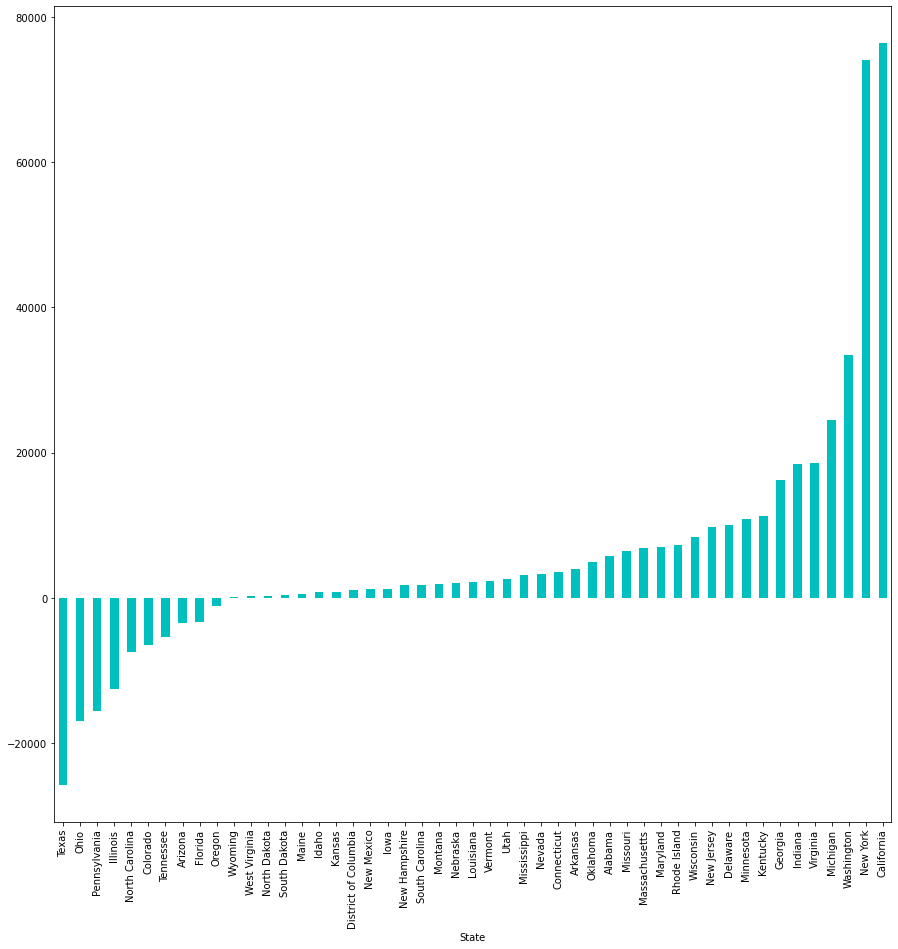

In [35]:
plt = store.groupby(('State'))['Profit'].sum().sort_values()

plt.plot(kind= 'bar', figsize=(15,15),color='c')

In [36]:
len(store.State.unique())

49

<AxesSubplot:xlabel='State'>

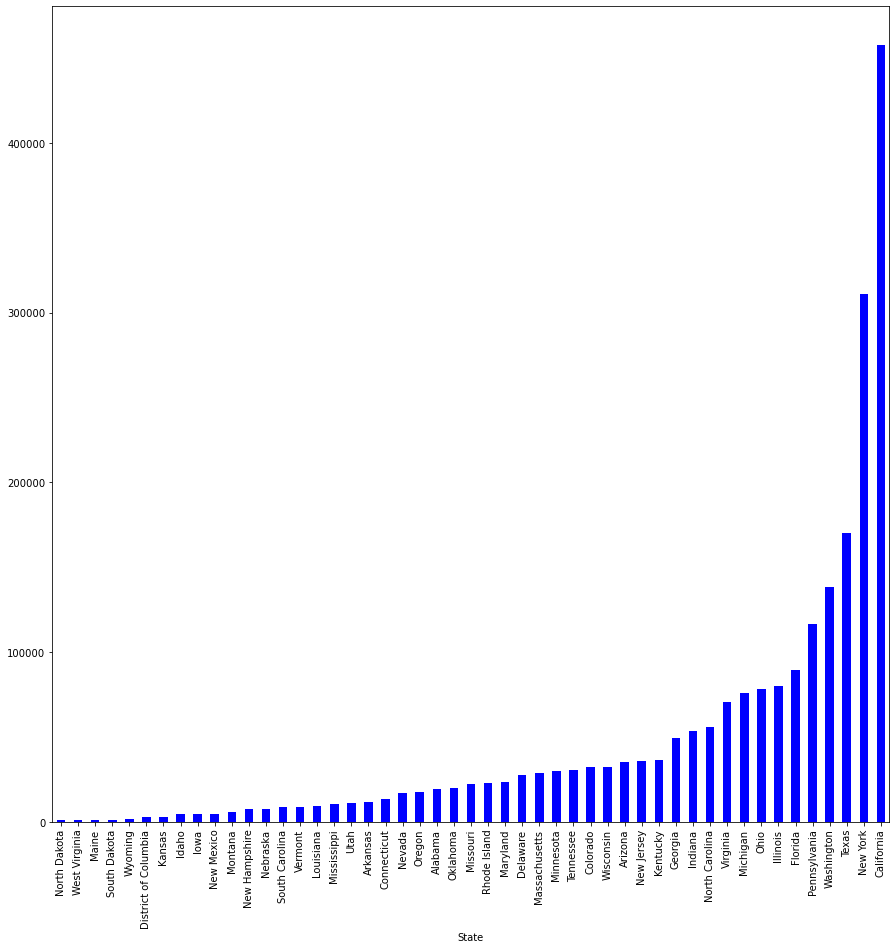

In [37]:
plt = store.groupby(('State'))['Sales'].sum().sort_values()

plt.plot(kind= 'bar', figsize=(15,15),color='b')

### - Point to be noted is that despite of having high sales in states like Texes, Ohio, Pennsylvania the profit percentage is negative 



<AxesSubplot:xlabel='City'>

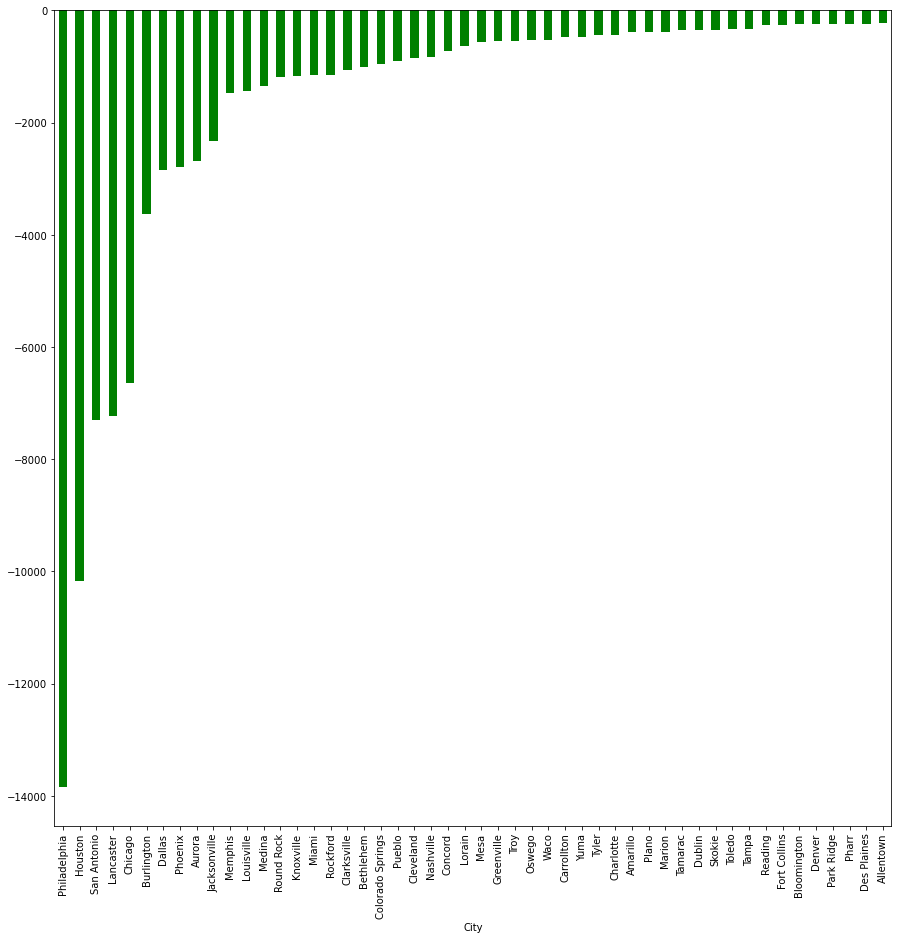

In [38]:
plt = store.groupby(('City'))['Profit'].sum().sort_values()[0:50]
plt.plot(kind= 'bar', figsize=(15,15),color='g')

In [39]:
len(store.City.unique())

531

<AxesSubplot:xlabel='City'>

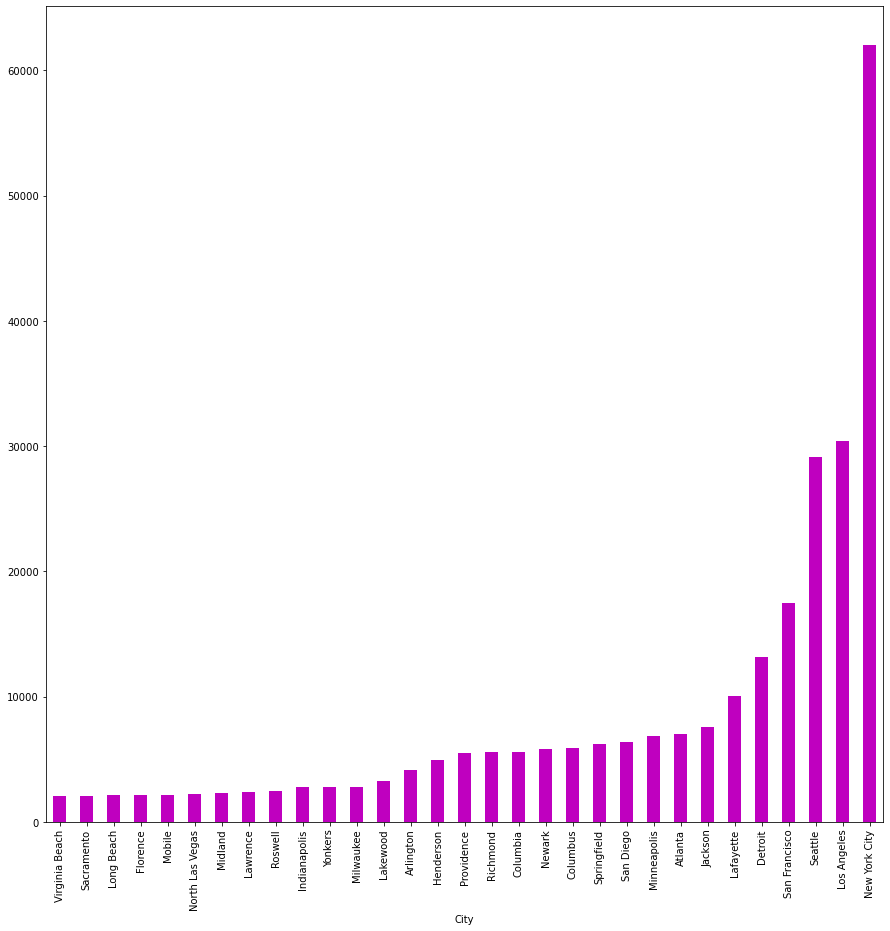

In [40]:
plt = store.groupby(('City'))['Profit'].sum().sort_values()[500:]
plt.plot(kind= 'bar', figsize=(15,15),color='m')

In [41]:
df = store[store['City'] == "Philadelphia"]['Sales']
df.count()

536

<AxesSubplot:xlabel='City'>

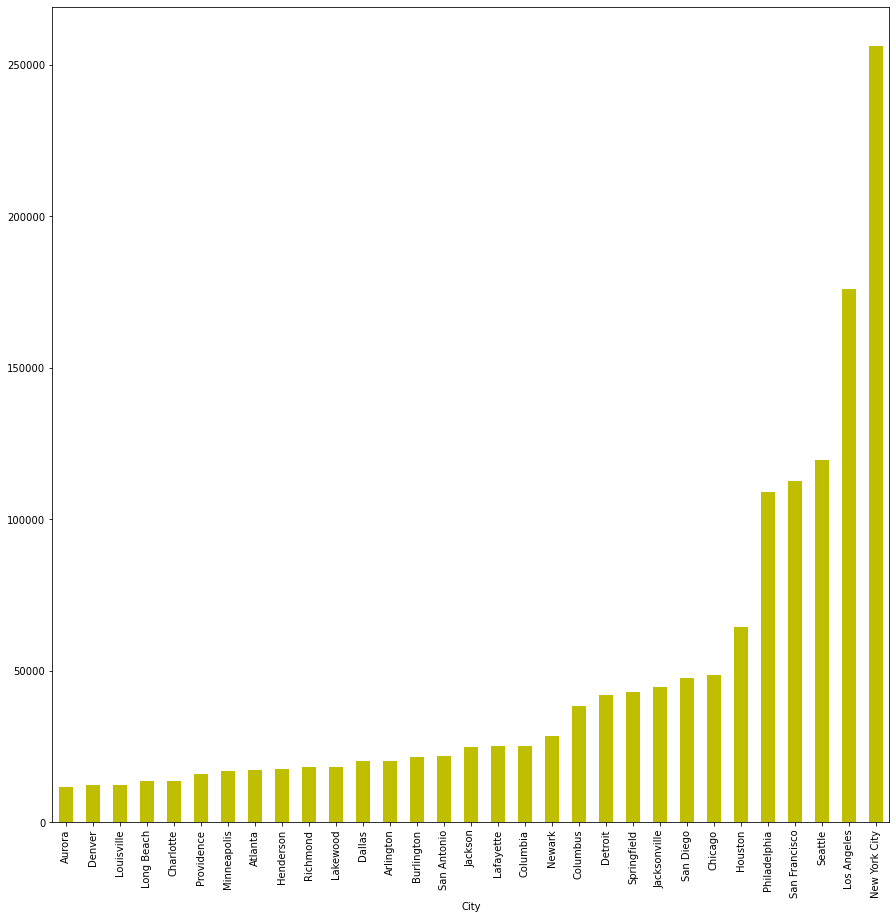

In [42]:
plt = store.groupby(('City'))['Sales'].sum().sort_values()[500:]
plt.plot(kind= 'bar', figsize=(15,15),color='y')

### - We can observe the same thing in cities that despite of having highest sales in Philadelphia, Chicago, Houston we see a negative graph in profit section

<AxesSubplot:xlabel='State'>

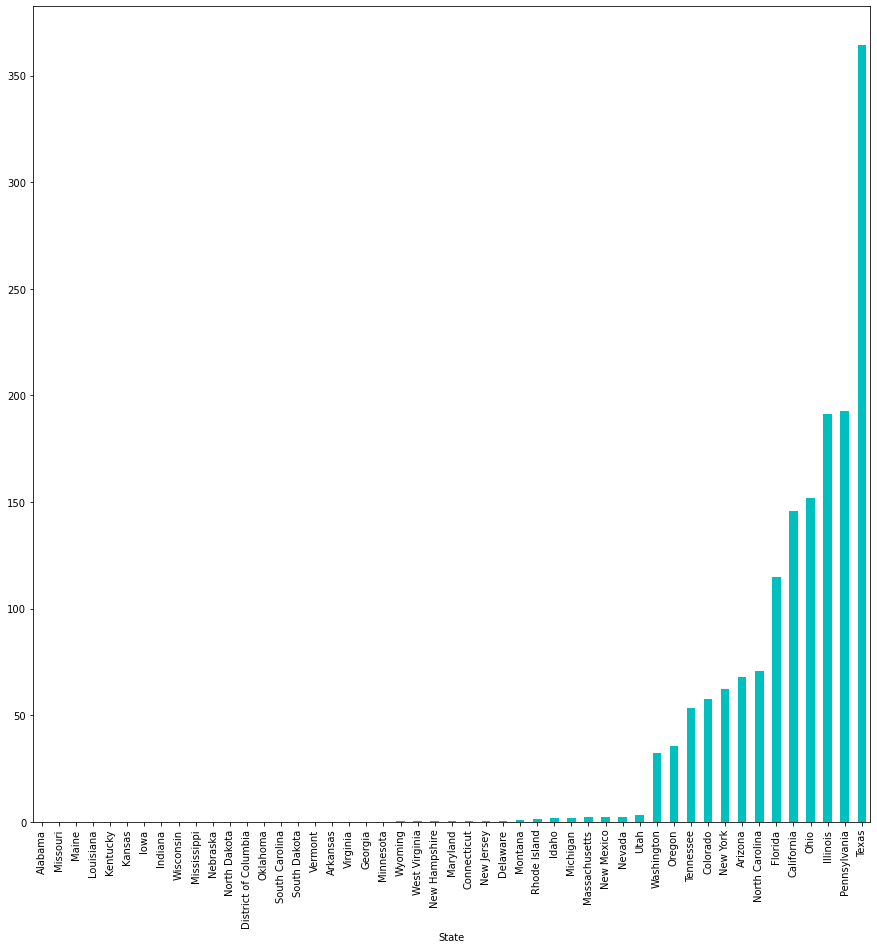

In [43]:
plt = store.groupby(('State'))['Discount'].sum().sort_values()

plt.plot(kind= 'bar', figsize=(15,15),color='c')

<AxesSubplot:xlabel='City'>

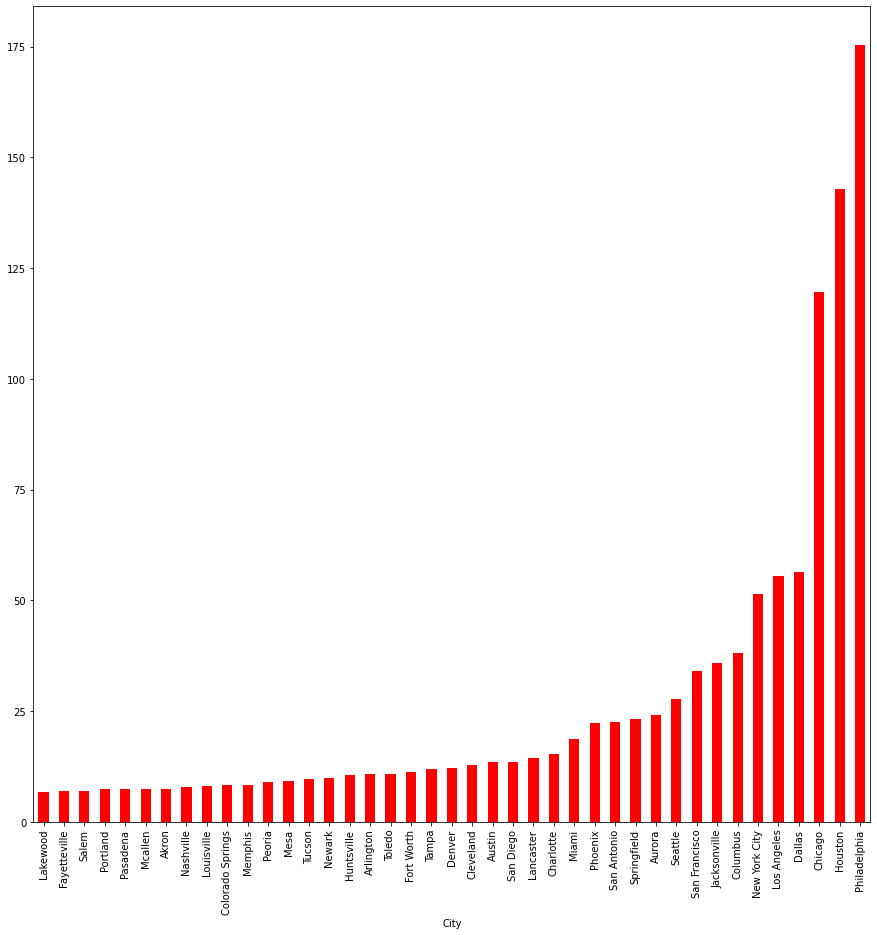

In [44]:
plt = store.groupby(('City'))['Discount'].sum().sort_values()[490:]

plt.plot(kind= 'bar', figsize=(15,15),color='r')

### - From the above graph we can conclude that states like Texas, Pennsylvania, LLinois, Ohio have negative rate in profit because they provide more discount than other states
### - Similarly in cities like Philadelphia, Chicago, Houston have high sales with less profit because they provide more discount

In [45]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
from matplotlib import pyplot as plt


<AxesSubplot:xlabel='Region', ylabel='count'>

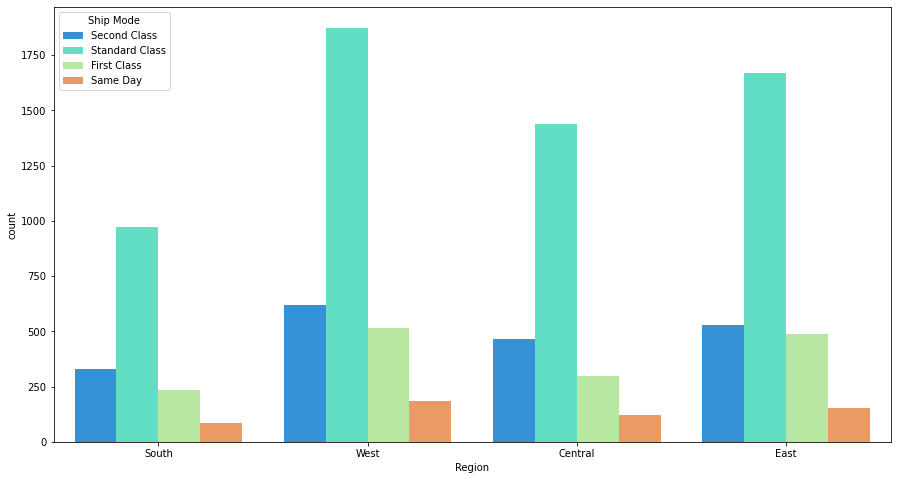

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Ship Mode', x="Region",palette='rainbow')

#### - The west and East regions have more orders than the other, we need to find out what is the cause for it.

<AxesSubplot:xlabel='Category', ylabel='count'>

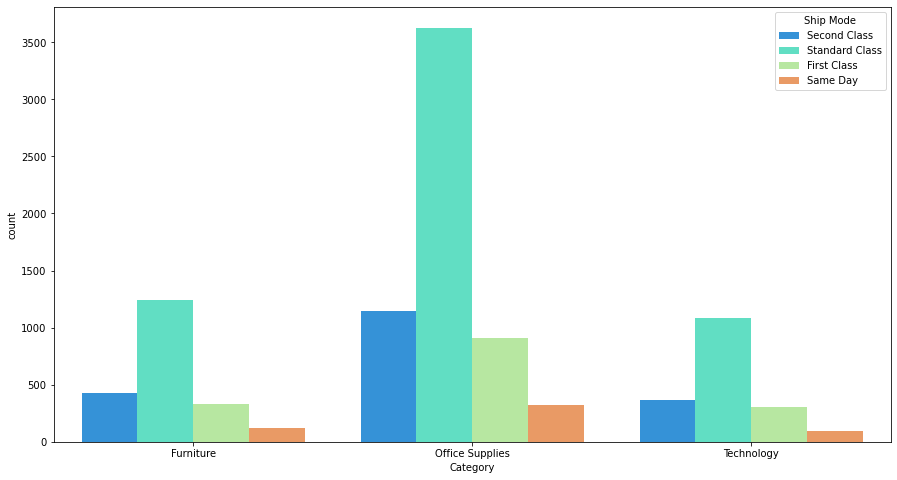

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Ship Mode', x="Category",palette='rainbow')

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

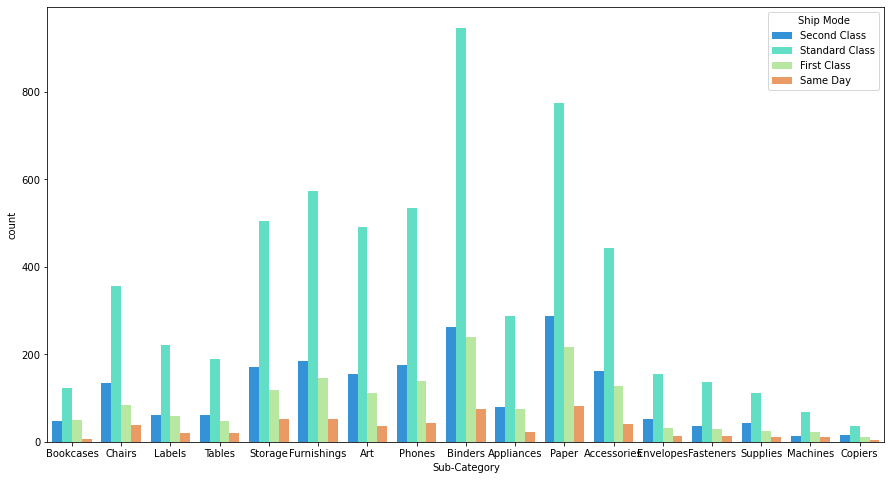

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Ship Mode', x="Sub-Category",palette='rainbow')

In [50]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:xlabel='Region', ylabel='count'>

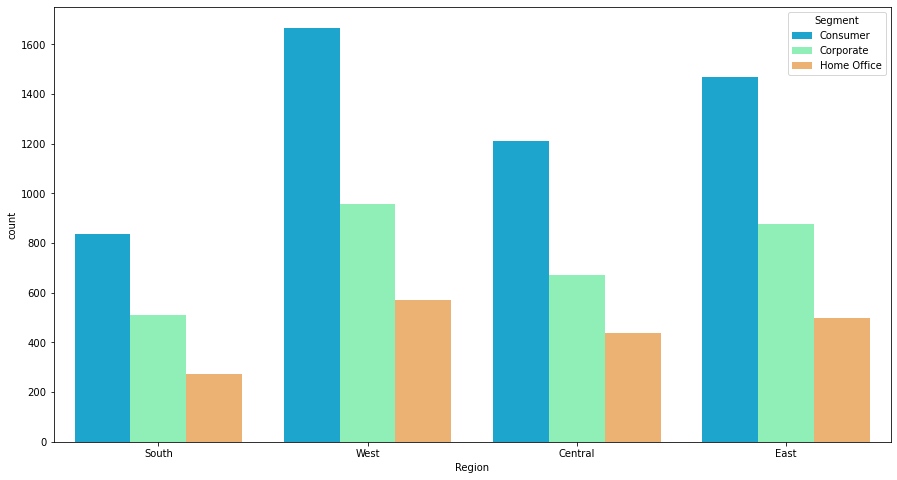

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Segment', x="Region",palette='rainbow')

<AxesSubplot:xlabel='Category', ylabel='count'>

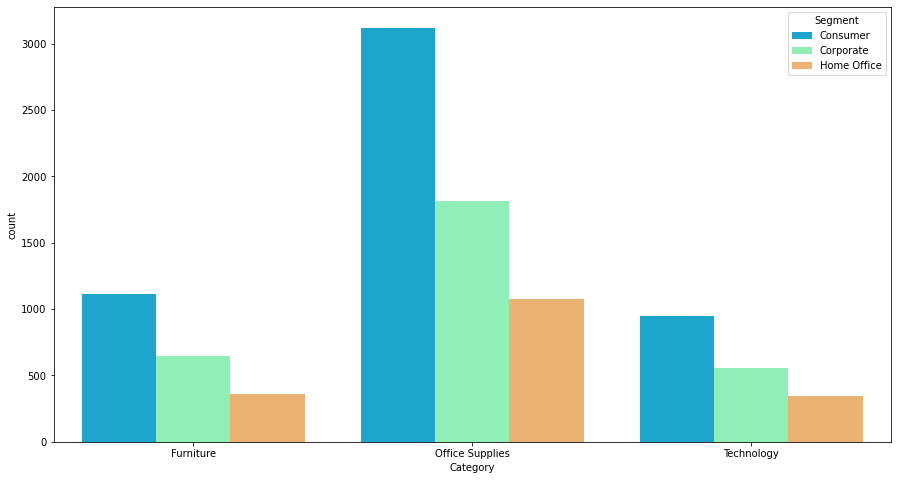

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Segment', x="Category",palette='rainbow')

<AxesSubplot:xlabel='Quantity', ylabel='count'>

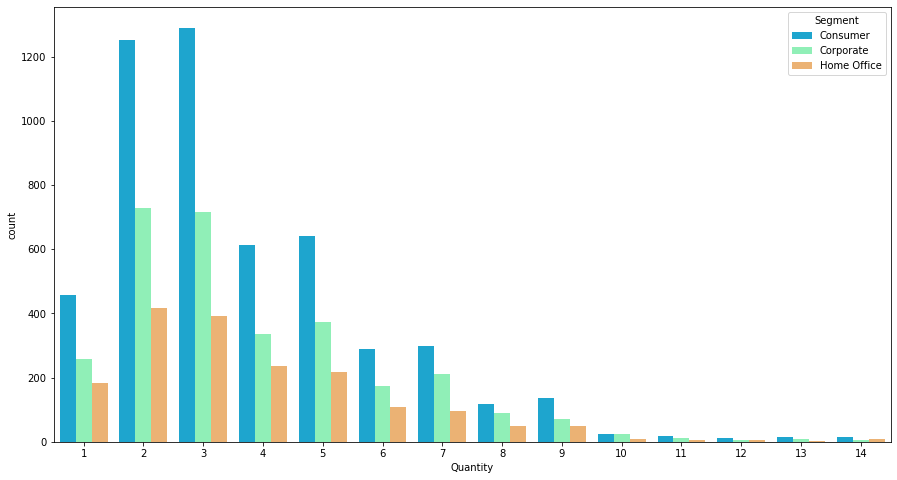

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Segment', x="Quantity",palette='rainbow')

<AxesSubplot:xlabel='Quantity', ylabel='count'>

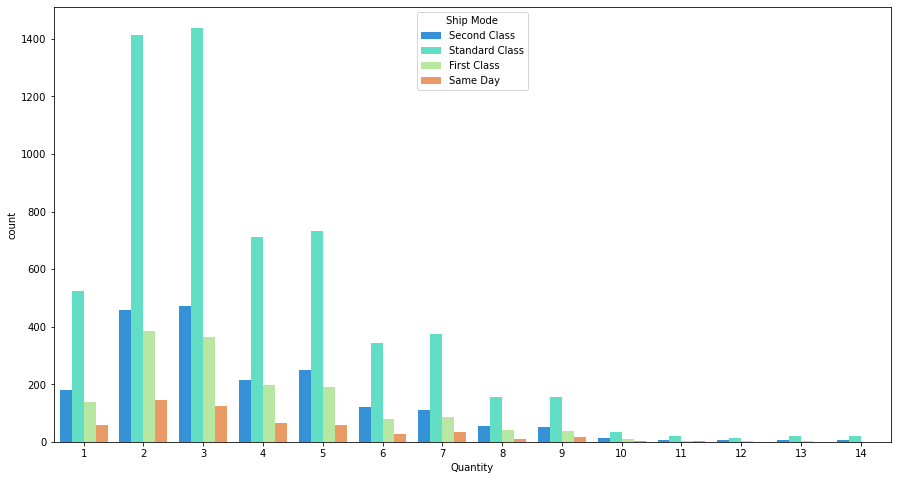

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Ship Mode', x="Quantity",palette='rainbow')

<AxesSubplot:xlabel='Quantity', ylabel='count'>

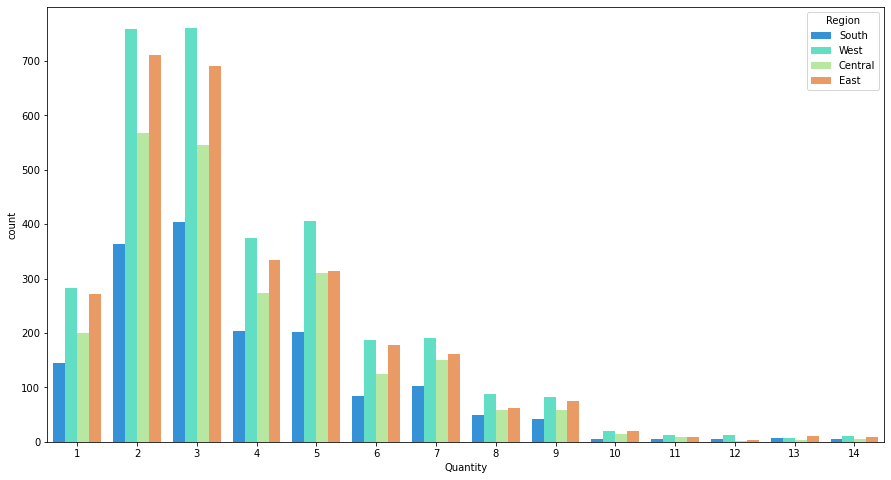

In [55]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, hue='Region', x="Quantity",palette='rainbow')

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

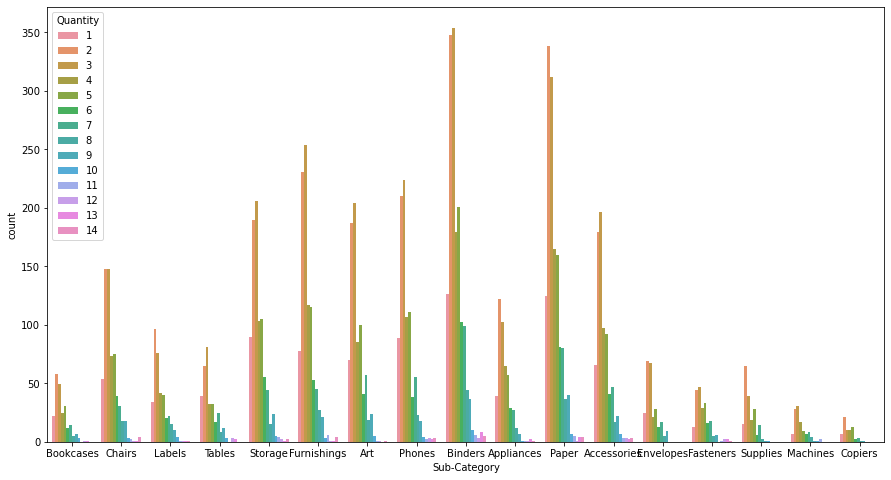

In [56]:
plt.figure(figsize=(15,8))
sns.countplot(data=store, x='Sub-Category', hue="Quantity")

#### - We find that in above graph office supliers has more demand and Binders, papers, Furnishings are ordered in  more of quantity

In [57]:
store.Quantity.unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [58]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:xlabel='Ship Mode'>

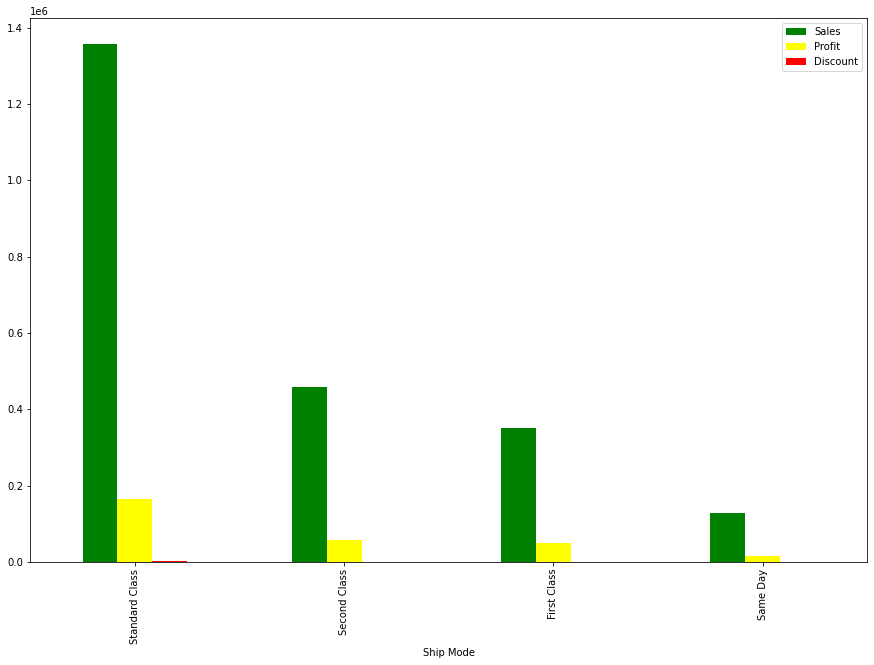

In [59]:
ps = store.groupby('Ship Mode') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
#ps = store.groupby('Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green','yellow','red'],figsize=(15,10))

<AxesSubplot:xlabel='Segment'>

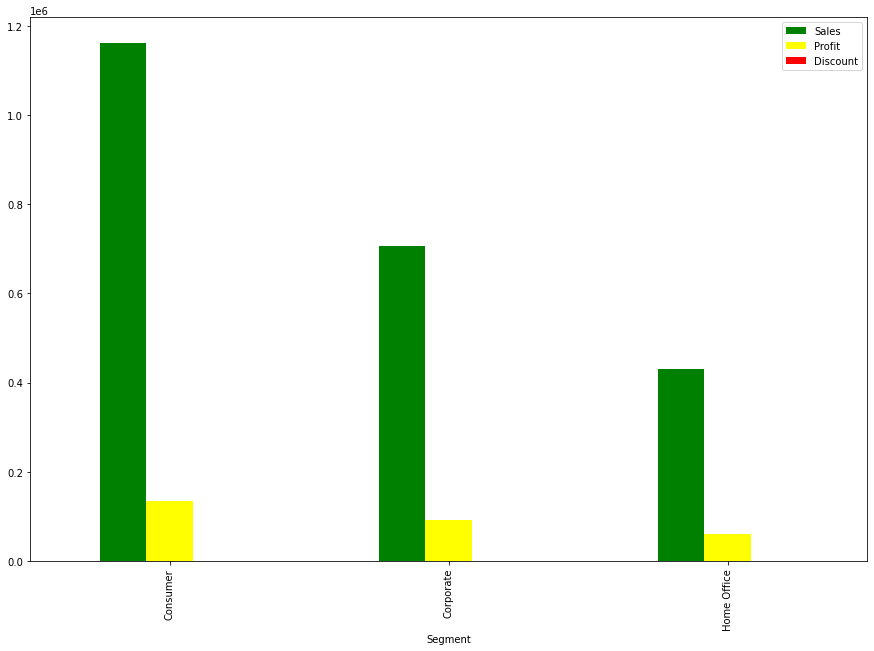

In [60]:
ps = store.groupby('Segment') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
#ps = store.groupby('Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green','yellow','red'],figsize=(15,10))

<AxesSubplot:xlabel='Category', ylabel='Discount'>

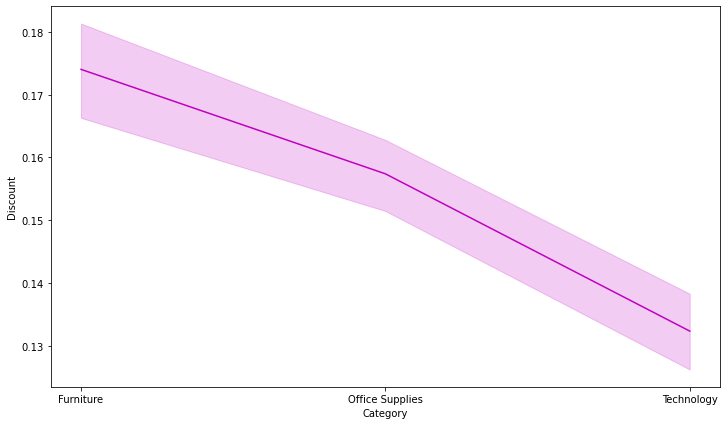

In [61]:
plt.figure(figsize=(12,7))
sns.lineplot(x=store['Category'], y=store["Discount"],color='m')

<AxesSubplot:xlabel='Category', ylabel='Sales'>

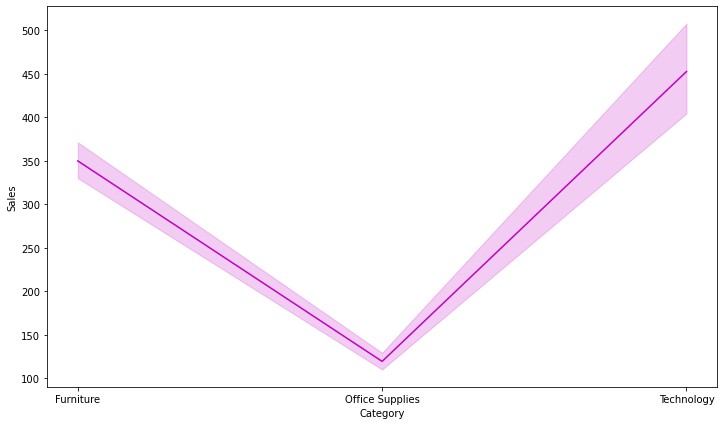

In [62]:
plt.figure(figsize=(12,7))
sns.lineplot(x=store['Category'], y=store["Sales"],color='m')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

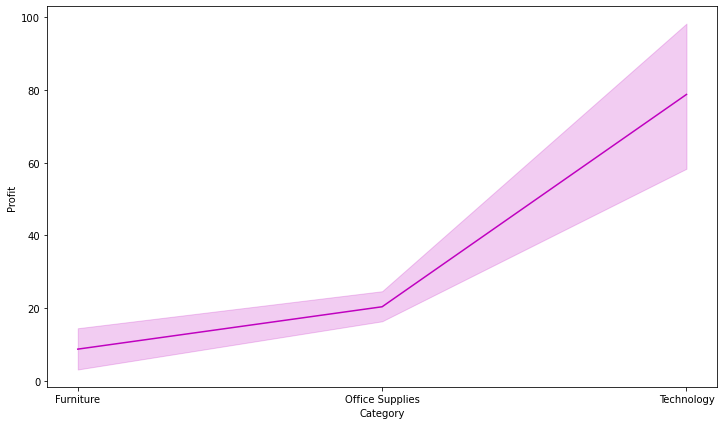

In [63]:
plt.figure(figsize=(12,7))
sns.lineplot(x=store['Category'], y=store["Profit"],color='m')

<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

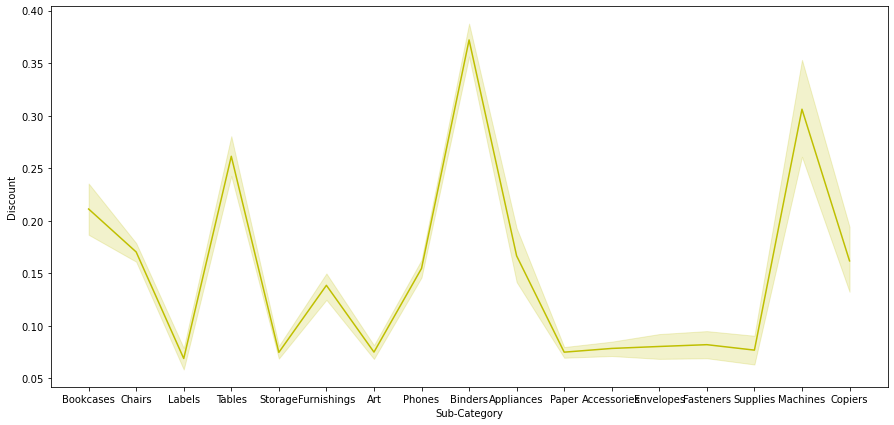

In [71]:
plt.figure(figsize=(15,7))
sns.lineplot(x=store['Sub-Category'], y=store["Discount"],color='y')

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

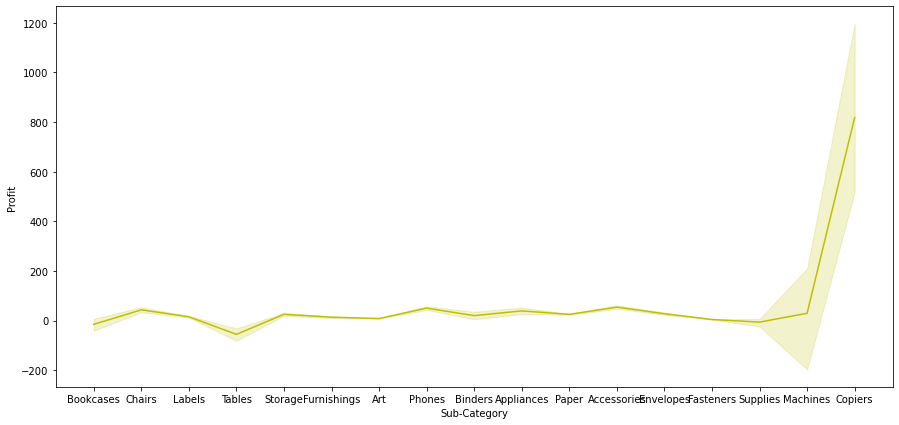

In [70]:
plt.figure(figsize=(15,7))
sns.lineplot(x=store['Sub-Category'], y=store["Profit"],color='y')

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

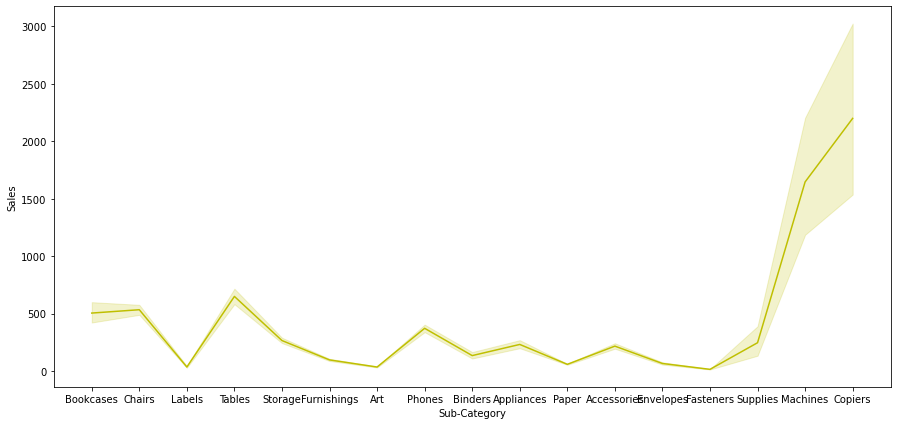

In [72]:
plt.figure(figsize=(15,7))
sns.lineplot(x=store['Sub-Category'], y=store["Sales"],color='y')

<AxesSubplot:xlabel='Sub-Category'>

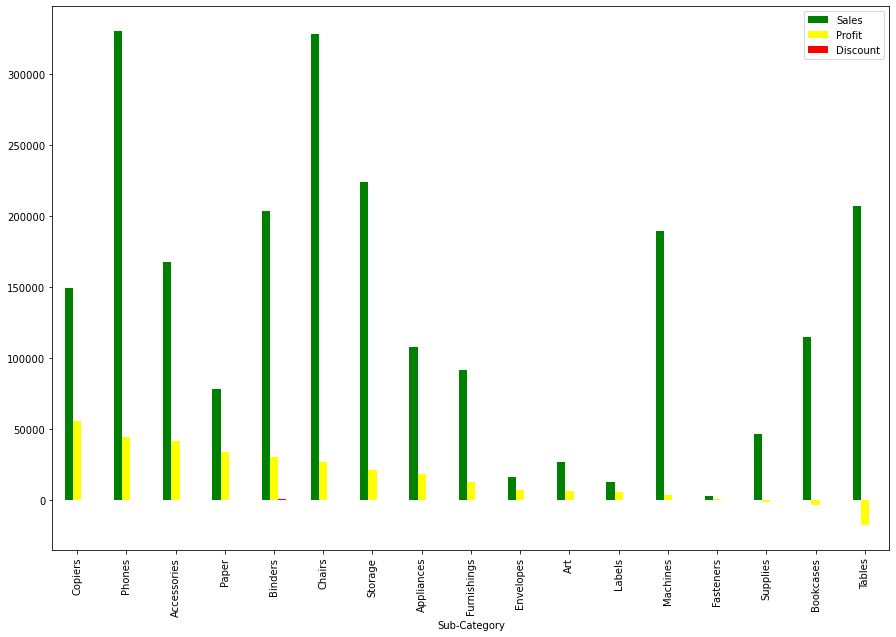

In [70]:
ps = store.groupby('Sub-Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
#ps = store.groupby('Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green','yellow','red'],figsize=(15,10))

In [444]:
store[store['Category'] == 'Office Supplies']['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

<AxesSubplot:xlabel='Sub-Category'>

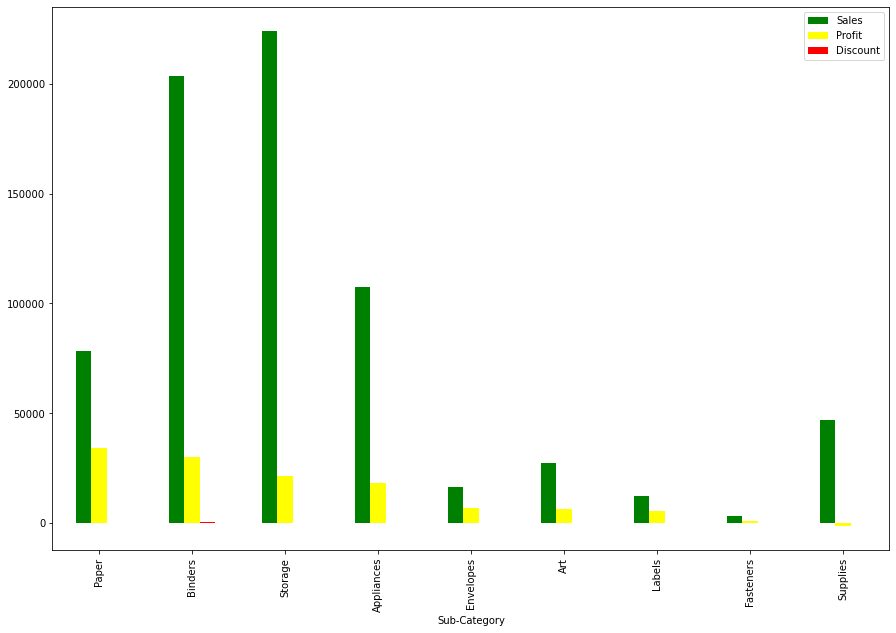

In [452]:
df = store[store['Category'] == 'Office Supplies']
ps = df.groupby('Sub-Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
#ps = store.groupby('Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green','yellow','red'],figsize=(15,10))

<AxesSubplot:xlabel='Sub-Category'>

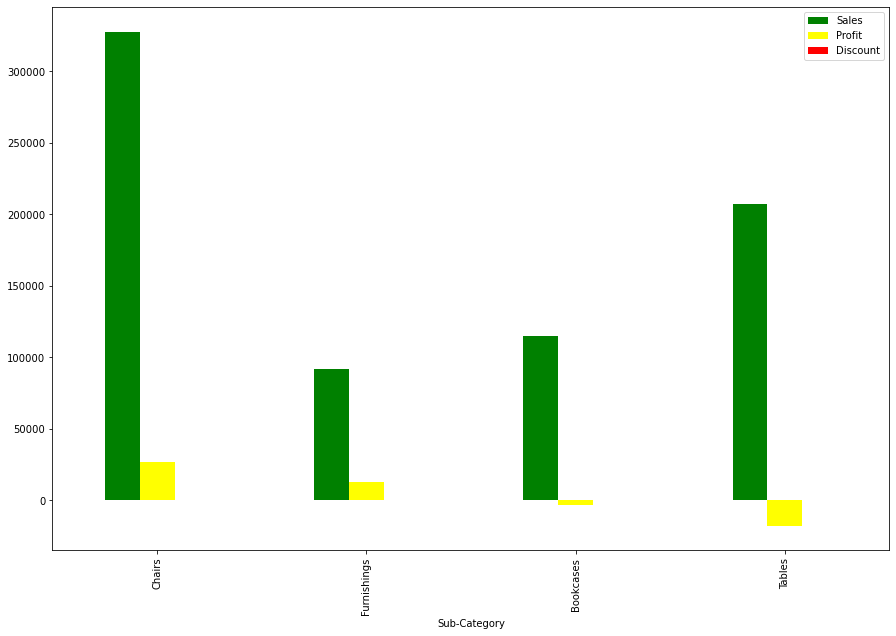

In [453]:
df = store[store['Category'] == 'Furniture']
ps = df.groupby('Sub-Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
#ps = store.groupby('Category') [['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green','yellow','red'],figsize=(15,10))

<AxesSubplot:xlabel='Region', ylabel='Discount'>

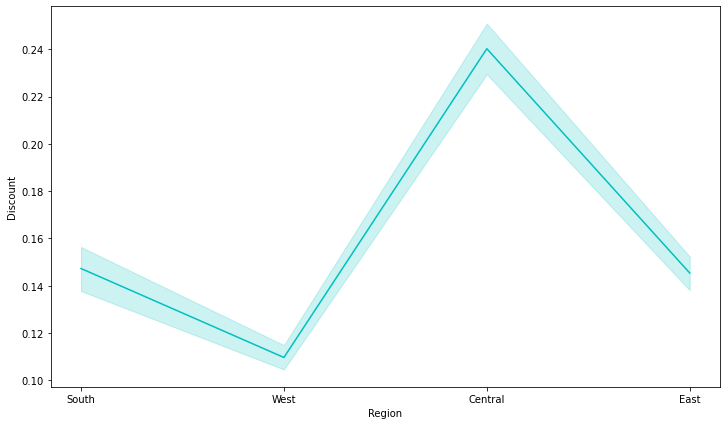

In [391]:
plt.figure(figsize=(12,7))
sns.lineplot(x=store['Region'], y=store["Discount"],color='c')

<AxesSubplot:xlabel='Region', ylabel='Sales'>

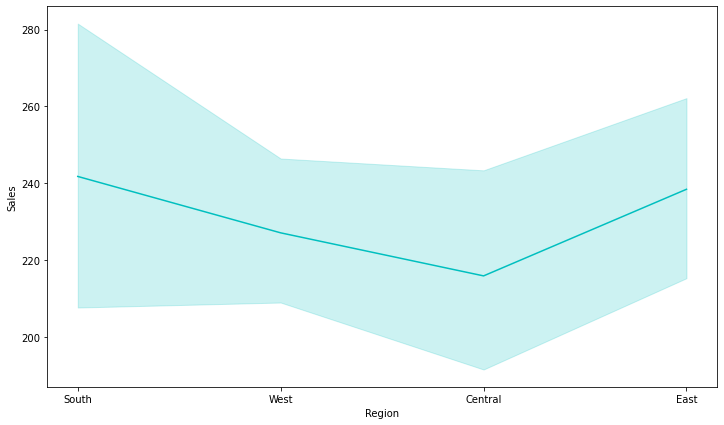

In [406]:
plt.figure(figsize=(12,7))
sns.lineplot(y=store['Sales'], x=store["Region"],color='c')

<AxesSubplot:xlabel='Region', ylabel='Profit'>

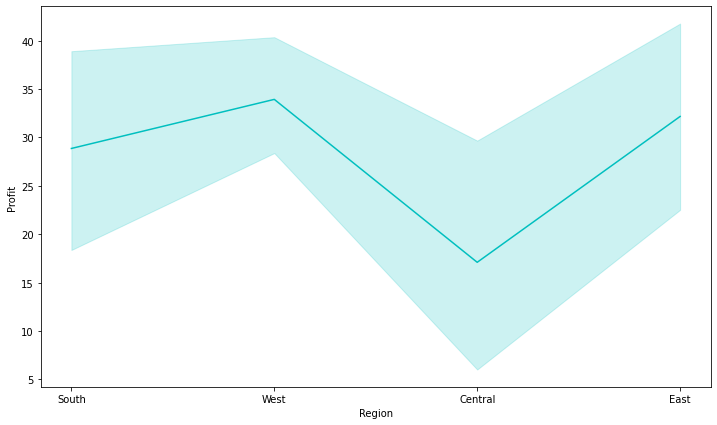

In [400]:
plt.figure(figsize=(12,7))
sns.lineplot(y=store['Profit'], x=store["Region"],color='c')

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

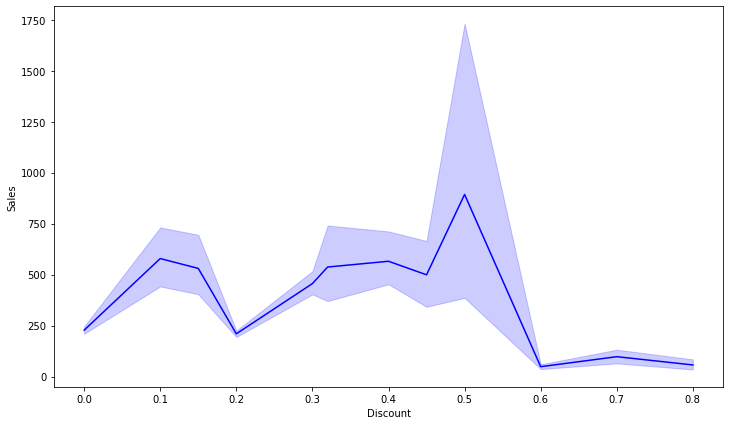

In [390]:
plt.figure(figsize=(12,7))
sns.lineplot(y=store['Sales'], x=store["Discount"],color='b')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

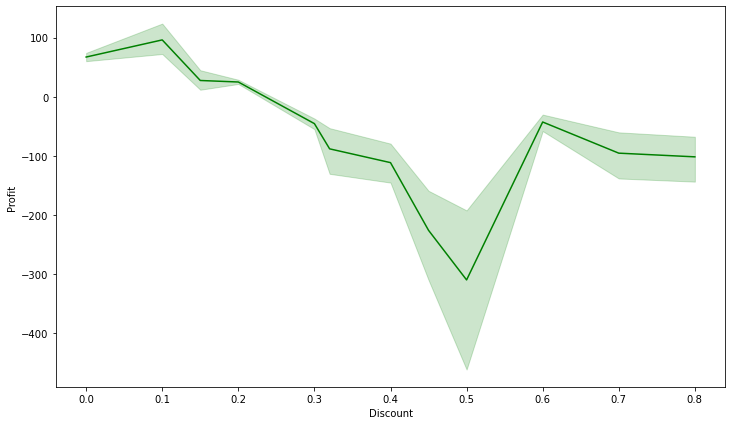

In [74]:
plt.figure(figsize=(12,7))
sns.lineplot(y=store['Profit'], x=store["Discount"],color='g')

####  - From the above we can say that giving more discount increases sales but at the same time it also decreses the profit , the minimal number of discount should be given is upto 0.1 or 10% this will maintain balance in profit percentage.
####  - In The Sub - Category section the Tables followed by Phones, Machines give less profit despite of high sales (discount should be reduced on this categories), Copiers, Binders, Paper, Accessories, Art, Furnishing give a descent profit even with constant number of sales
#### - In addition discount on Binders can be made less in order to ahive more profit

#### - In Regions the West and East give more profit as discount is less and "Central and South" should also adopt less discount policy to gain more profits

####  -Technology and Office Supplies maintains an equlirium with respect to Discount, Sales and profit. But Furniture provides loss as it gives more discount and with less number of sales


<AxesSubplot:xlabel='Sub-Category'>

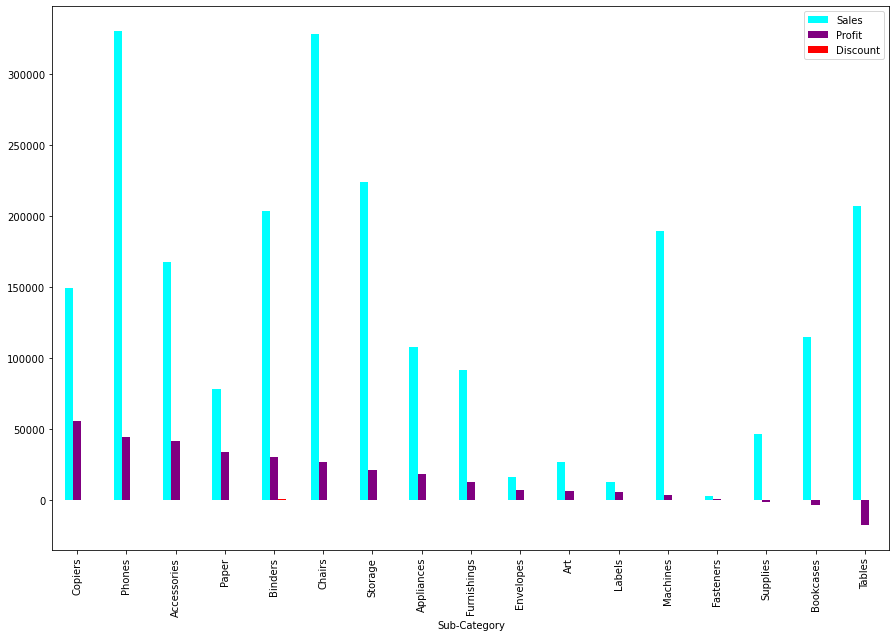

In [437]:
ps = store.groupby('Sub-Category')[['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['cyan','purple','red'],figsize=(15,10))

<AxesSubplot:xlabel='Category'>

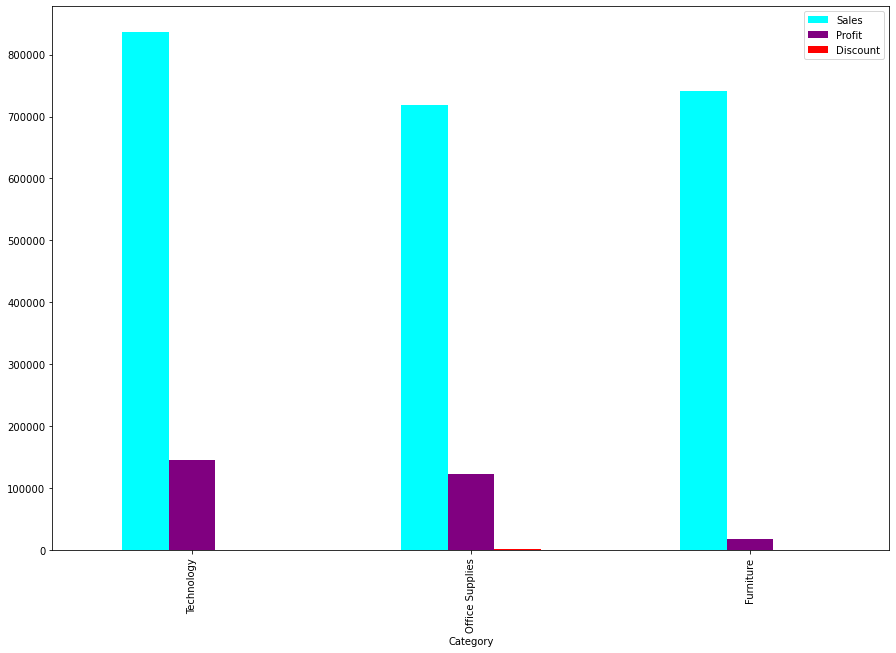

In [438]:
ps = store.groupby('Category')[['Sales','Profit','Discount']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['cyan','purple','red'],figsize=(15,10))

## Conclusion

1. The Technology Category provides higher profits with more number of sales. In this category the discount can be given occasionally In order to maintain friendly and trustful  relationship with customers of store.
<br> 
 
 
2. The office Supplies provide a descent profits, reducing discount on **Binders** can give more porfit in Office Supplies category.
<br>


3. Whereas in the Furniture category the **"Bookcase and tables"** give losses to the company so, these supply of the products should be temporarly stopped as it acquires lossess to the Retail store.
<br>


4. The Discount range **should not be more than 10%** in any of the category or segment. after crossing 10% of discount rate the graph gradully decreases and cause loss to the retail store.
<br>


5. The Regions like West and East give more profit as discounts are less, whereas regions like **"Central and South"** should also adopt less discount policy to gain more profits. 
<br>


6. New Schemes should be introduced in centeal and south region.
<br>


7. The states like California, NewYork, Washington, Michigan and cities like NewYork city, Los Angele, Seattle, San Francisco have higher amount of consumers and give more profit compared to others.
<br>


8. Despite of being high sales in states like **Texas, Ohio, Pennsylvania** and cities like **Philandelphia, Houstn, San Antonio, Chicago** the profit curve is **negative** and retail store is acquiring losses from these regions, This is Due to the high discount rate in these states and  cities. The discount percentage should be reduced in these states and cities.
<br>


9. These above cities and states must be seriously taken care off by the company and immediate action should be taken to improve profit perccentage. The above regions must adopt similar policies and methods of other high profit gaining regions in order the achieve profits.
<br>

10. In Segments like Home Office and Corporates should also be promoted to buy more products in bulk and increase sales in  that segment by giving descent discount to gain more profit to the store.
